In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM,GRU,SimpleRNN,Embedding,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
from tensorflow.keras.models import load_model

In [4]:
df = pd.read_csv("bbc_text_cls.csv")

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
df['targets'] = df['labels'].astype('category').cat.codes

In [7]:
# Number of classes
K=df['targets'].max()+1
K

5

In [8]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)

In [9]:
MAX_VOCAB_SIZE=2000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train=tokenizer.texts_to_sequences(df_train['text'])
sequences_test=tokenizer.texts_to_sequences(df_test['text'])

In [10]:
word2idx=tokenizer.word_index
V=len(word2idx)
V

27758

In [11]:
data_train=pad_sequences(sequences_train)
print(data_train.shape)
T=data_train.shape[1]

(1557, 2837)


In [12]:
data_test=pad_sequences(sequences_test,maxlen=T)
print(data_test.shape)

(668, 2837)


**ANN**

In [25]:
i=Input(shape=(T,))
x=Dense(300,activation='relu')(i)
x=Dense(K)(x)
model=Model(i,x)

In [26]:
model.compile(
loss=SparseCategoricalCrossentropy(from_logits=True),
optimizer='adam',
metrics=['accuracy']
)

In [27]:
r = model.fit(data_train,df_train['targets'],epochs=50,validation_data=(data_test,df_test['targets']))

Epoch 1/50
49/49 [==============================] - 1s 7ms/step - loss: 174.5832 - accuracy: 0.2575 - val_loss: 93.1291 - val_accuracy: 0.2665
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 22.7318 - accuracy: 0.5877 - val_loss: 61.4848 - val_accuracy: 0.2949
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 5.9709 - accuracy: 0.7925 - val_loss: 57.8849 - val_accuracy: 0.3398
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 1.8908 - accuracy: 0.9030 - val_loss: 65.3554 - val_accuracy: 0.3308
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 1.7333 - accuracy: 0.9351 - val_loss: 55.6614 - val_accuracy: 0.3488
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.7245 - accuracy: 0.9544 - val_loss: 62.6717 - val_accuracy: 0.3488
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.9685 - val_loss: 63.2313 - val_accuracy: 0.3473
Epoch 8/50

In [28]:
model.save('final_model_ann.h5')

In [29]:
model.evaluate(data_test,df_test['targets'])

21/21 [==============================] - 0s 2ms/step - loss: 72.5399 - accuracy: 0.3323


[72.53990936279297, 0.33233532309532166]

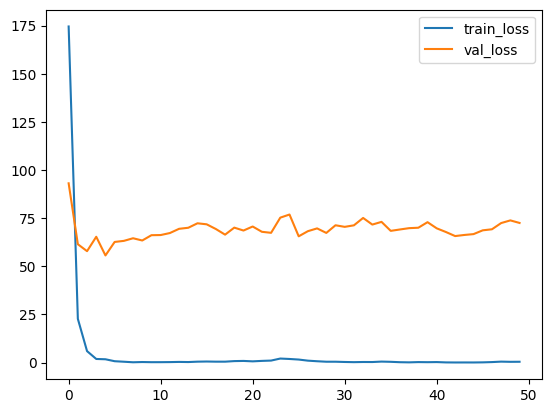

In [30]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

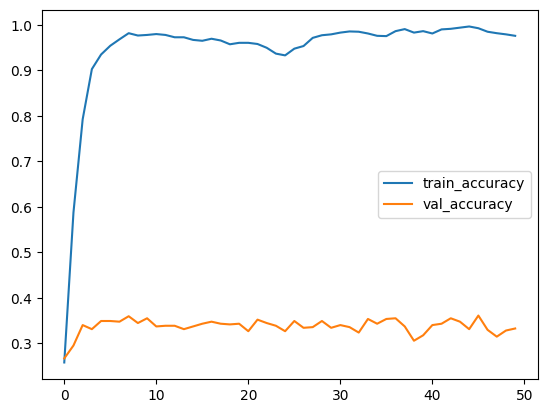

In [31]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();

**CNN**

In [17]:
D=50
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3, activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(K)(x)
model=Model(i,x)

In [18]:
model.compile(
loss=SparseCategoricalCrossentropy(from_logits=True),
optimizer='adam',
metrics=['accuracy']
)

In [19]:
r = model.fit(data_train,df_train['targets'],epochs=50,validation_data=(data_test,df_test['targets']))

Epoch 1/50
49/49 [==============================] - 20s 201ms/step - loss: 1.5683 - accuracy: 0.3571 - val_loss: 1.4865 - val_accuracy: 0.4536
Epoch 2/50
49/49 [==============================] - 8s 155ms/step - loss: 1.3456 - accuracy: 0.5665 - val_loss: 1.1734 - val_accuracy: 0.7530
Epoch 3/50
49/49 [==============================] - 8s 155ms/step - loss: 0.9169 - accuracy: 0.8523 - val_loss: 0.7140 - val_accuracy: 0.8937
Epoch 4/50
49/49 [==============================] - 5s 90ms/step - loss: 0.4999 - accuracy: 0.9255 - val_loss: 0.4291 - val_accuracy: 0.9087
Epoch 5/50
49/49 [==============================] - 4s 69ms/step - loss: 0.2833 - accuracy: 0.9512 - val_loss: 0.3091 - val_accuracy: 0.9177
Epoch 6/50
49/49 [==============================] - 4s 85ms/step - loss: 0.1835 - accuracy: 0.9705 - val_loss: 0.2509 - val_accuracy: 0.9237
Epoch 7/50
49/49 [==============================] - 2s 45ms/step - loss: 0.1276 - accuracy: 0.9820 - val_loss: 0.2186 - val_accuracy: 0.9251
Epoch 8/5

In [20]:
model.save('final_model_cnn.h5')

In [21]:
model.evaluate(data_test,df_test['targets'])

21/21 [==============================] - 0s 5ms/step - loss: 0.1636 - accuracy: 0.9551


[0.16363610327243805, 0.955089807510376]

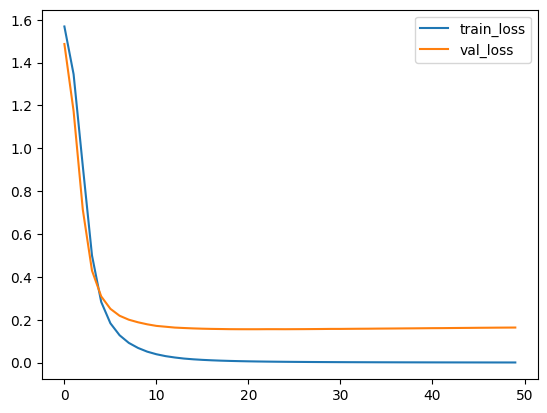

In [22]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

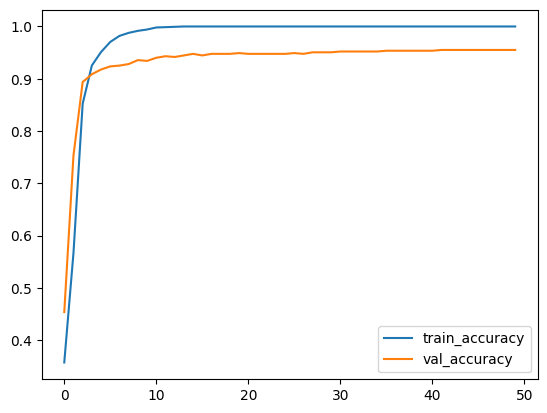

In [23]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();

LSTM

In [ ]:
D=20
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(32,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(K)(x)

model=Model(i,x)

In [ ]:
model.compile(
loss=SparseCategoricalCrossentropy(from_logits=True),
optimizer='adam',
metrics=['accuracy']
)

In [ ]:
r = model.fit(data_train,df_train['targets'],epochs=50,validation_data=(data_test,df_test['targets']))

Epoch 1/50
49/49 [==============================] - 22s 306ms/step - loss: 1.6019 - accuracy: 0.2505 - val_loss: 1.5922 - val_accuracy: 0.2096
Epoch 2/50
49/49 [==============================] - 13s 275ms/step - loss: 1.5051 - accuracy: 0.3423 - val_loss: 1.3498 - val_accuracy: 0.4386
Epoch 3/50
49/49 [==============================] - 8s 171ms/step - loss: 1.5316 - accuracy: 0.2614 - val_loss: 1.5469 - val_accuracy: 0.2754
Epoch 4/50
49/49 [==============================] - 8s 171ms/step - loss: 1.4813 - accuracy: 0.3764 - val_loss: 1.3866 - val_accuracy: 0.5195
Epoch 5/50
49/49 [==============================] - 8s 155ms/step - loss: 1.1845 - accuracy: 0.6262 - val_loss: 1.1326 - val_accuracy: 0.5868
Epoch 6/50
49/49 [==============================] - 7s 140ms/step - loss: 1.0104 - accuracy: 0.6557 - val_loss: 0.9453 - val_accuracy: 0.6796
Epoch 7/50
49/49 [==============================] - 8s 152ms/step - loss: 0.8150 - accuracy: 0.7643 - val_loss: 0.7421 - val_accuracy: 0.8443
Epoc

In [ ]:
model.save('final_model.h5')

In [ ]:
model.evaluate(data_test,df_test['targets'])

21/21 [==============================] - 1s 34ms/step - loss: 0.1915 - accuracy: 0.9566


[0.19152653217315674, 0.9565868377685547]

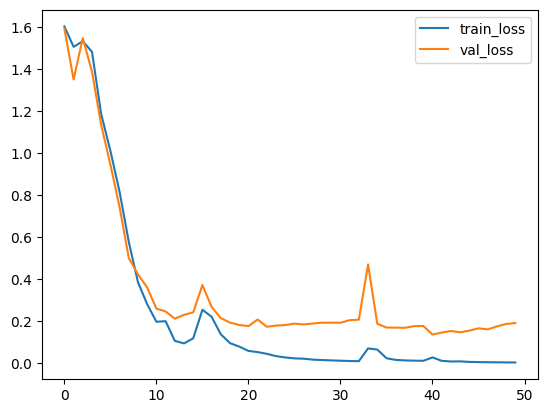

In [ ]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

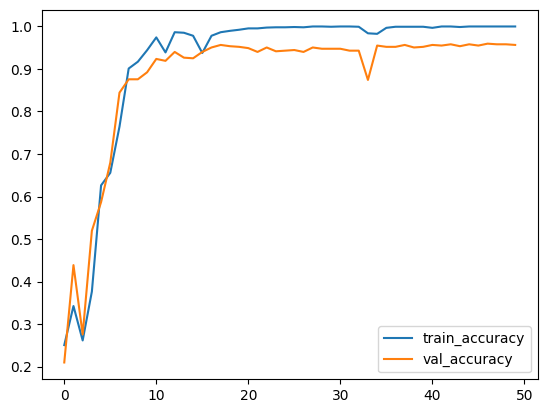

In [ ]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();

In [13]:
mapping=dict()
for i,j in zip(df['labels'],df['targets']):
    mapping[j]=i

In [14]:
mapping

{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}

In [15]:
model=load_model("final_model_lstm.h5")

In [16]:
def predict(text):
    test_sentence=tokenizer.texts_to_sequences(text)
    test_sentence=pad_sequences(test_sentence,maxlen=T)
    result=model.predict(test_sentence)
    ans=mapping[result.argmax()]
    return ans

In [17]:
texts=[['Rigging is done in election'],['I like to play football'],['Neural networks are difficult'],
       ['Tennis Tournament starts in May'],['Oil prices are increasing']]

In [18]:
for text in texts:
    ans=predict(text)
    text=' '.join(text)
    print(f'{text} belongs to: {ans} category')

1/1 [==============================] - 1s 1s/step
Rigging is done in election belongs to: politics category
1/1 [==============================] - 0s 303ms/step
I like to play football belongs to: sport category
1/1 [==============================] - 0s 303ms/step
Neural networks are difficult belongs to: tech category
1/1 [==============================] - 0s 290ms/step
Tennis Tournament starts in May belongs to: sport category
1/1 [==============================] - 0s 298ms/step
Oil prices are increasing belongs to: business category
